### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
df = pd.read_csv('waste_disposal_data_11-29-2021.txt')

In [3]:
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,0.0,Fc,Calculated data
1,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,0.0,Fc,Calculated data
2,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,0.0,Fc,Calculated data
3,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,0.0,Fc,Calculated data
4,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,0.0,Fc,Calculated data


### EDA

#### Shape of Data

In [4]:
df.shape

(6238, 14)

In [5]:
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)


Number of Rows       =  6238
Number of Columns    =  14


#### Data Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6238 non-null   object 
 1   Domain            6238 non-null   object 
 2   Area Code (ISO3)  6238 non-null   object 
 3   Area              6238 non-null   object 
 4   Element Code      6238 non-null   int64  
 5   Element           6238 non-null   object 
 6   Item Code         6238 non-null   int64  
 7   Item              6238 non-null   object 
 8   Year Code         6238 non-null   int64  
 9   Year              6238 non-null   int64  
 10  Unit              6238 non-null   object 
 11  Value             6238 non-null   float64
 12  Flag              6238 non-null   object 
 13  Flag Description  6238 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 682.4+ KB


#### Finding missing values

In [7]:
df.isnull().sum()


Domain Code         0
Domain              0
Area Code (ISO3)    0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

#### Finding missing values in percentage

In [8]:
df.isnull().sum() / df.shape[0] * 100


Domain Code         0.0
Domain              0.0
Area Code (ISO3)    0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64

#### Finding missing values with bar plot

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

<Figure size 3600x2400 with 0 Axes>

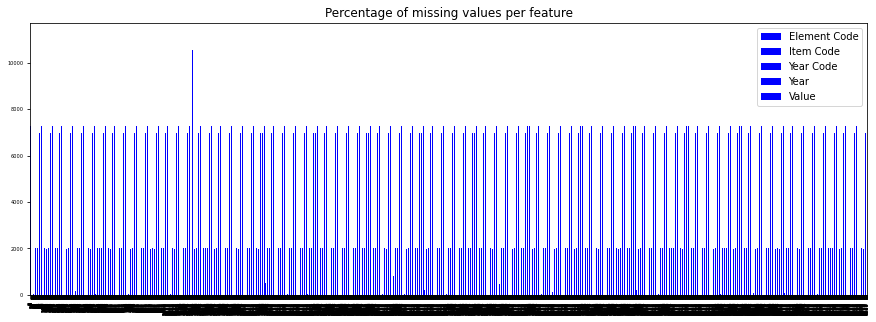

In [9]:
plt.figure(dpi=600)
df.plot(kind='bar', title='Percentage of missing values per feature', figsize=(15, 5),color='blue', fontsize=5)


#### Summary Statistics of data

In [10]:
df.describe()


,Element Code,Item Code,Year Code,Year,Value
count,6238.0,6238.0,6238.000000,6238.000000,6238.000000
mean,7273.0,6990.0,2004.677300,2004.677300,202.675467
std,0.0,0.0,8.603289,8.603289,1066.676986
min,7273.0,6990.0,1990.000000,1990.000000,0.000000
25%,7273.0,6990.0,1997.000000,1997.000000,0.000000
50%,7273.0,6990.0,2005.000000,2005.000000,0.652579
75%,7273.0,6990.0,2012.000000,2012.000000,30.517272
max,7273.0,6990.0,2019.000000,2019.000000,11151.696408


#### Value count

In [11]:
df['Value'].value_counts()


0.000000     2828
17.356301       1
17.343147       1
17.324444       1
17.311169       1
             ... 
47.010034       1
47.179100       1
47.292824       1
46.997779       1
35.841750       1
Name: Value, Length: 3411, dtype: int64

#### Hist plot

<AxesSubplot:xlabel='Value', ylabel='Count'>

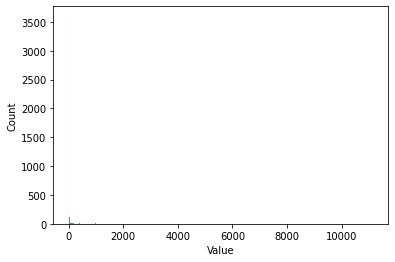

In [12]:
sns.histplot(df['Value'])


#### Dealing with duplicates

In [13]:
df.drop_duplicates(inplace=True)
print('Shape of Dataset after dropping the duplicates', df.shape)


Shape of Dataset after dropping the duplicates (6238, 14)


#### Skewness and kurtosis

In [14]:
df['Value'].agg(['skew', 'kurtosis']).transpose()


skew         8.415818
kurtosis    75.170198
Name: Value, dtype: float64

#### Boxplot to check outliers

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

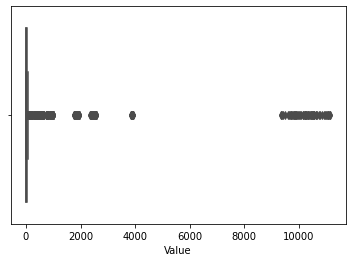

In [15]:
sns.boxplot(df['Value'], color="red")

#### Correlation

In [16]:
corr = df.corr(method="pearson")
corr


,Element Code,Item Code,Year Code,Year,Value
Element Code,NaN,NaN,NaN,NaN,NaN
Item Code,NaN,NaN,NaN,NaN,NaN
Year Code,NaN,NaN,1.00000,1.00000,0.00217
Year,NaN,NaN,1.00000,1.00000,0.00217
Value,NaN,NaN,0.00217,0.00217,1.00000


#### Heatmap

<AxesSubplot:>

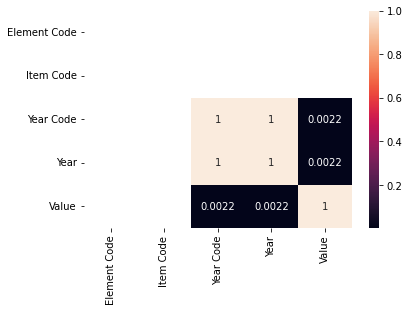

In [17]:
sns.heatmap(corr, annot=True)


#### To get more clear picture of data

In [18]:
df.nunique()

Domain Code            1
Domain                 1
Area Code (ISO3)     217
Area                 217
Element Code           1
Element                1
Item Code              1
Item                   1
Year Code             30
Year                  30
Unit                   1
Value               3411
Flag                   2
Flag Description       2
dtype: int64

#### Structure

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238 entries, 0 to 6237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6238 non-null   object 
 1   Domain            6238 non-null   object 
 2   Area Code (ISO3)  6238 non-null   object 
 3   Area              6238 non-null   object 
 4   Element Code      6238 non-null   int64  
 5   Element           6238 non-null   object 
 6   Item Code         6238 non-null   int64  
 7   Item              6238 non-null   object 
 8   Year Code         6238 non-null   int64  
 9   Year              6238 non-null   int64  
 10  Unit              6238 non-null   object 
 11  Value             6238 non-null   float64
 12  Flag              6238 non-null   object 
 13  Flag Description  6238 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 731.0+ KB


#### Countries data with highest and lowest value of CO2

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

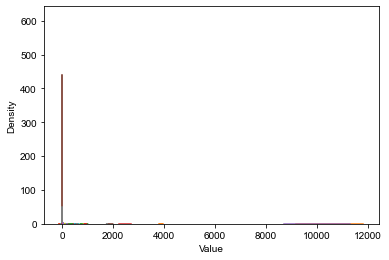

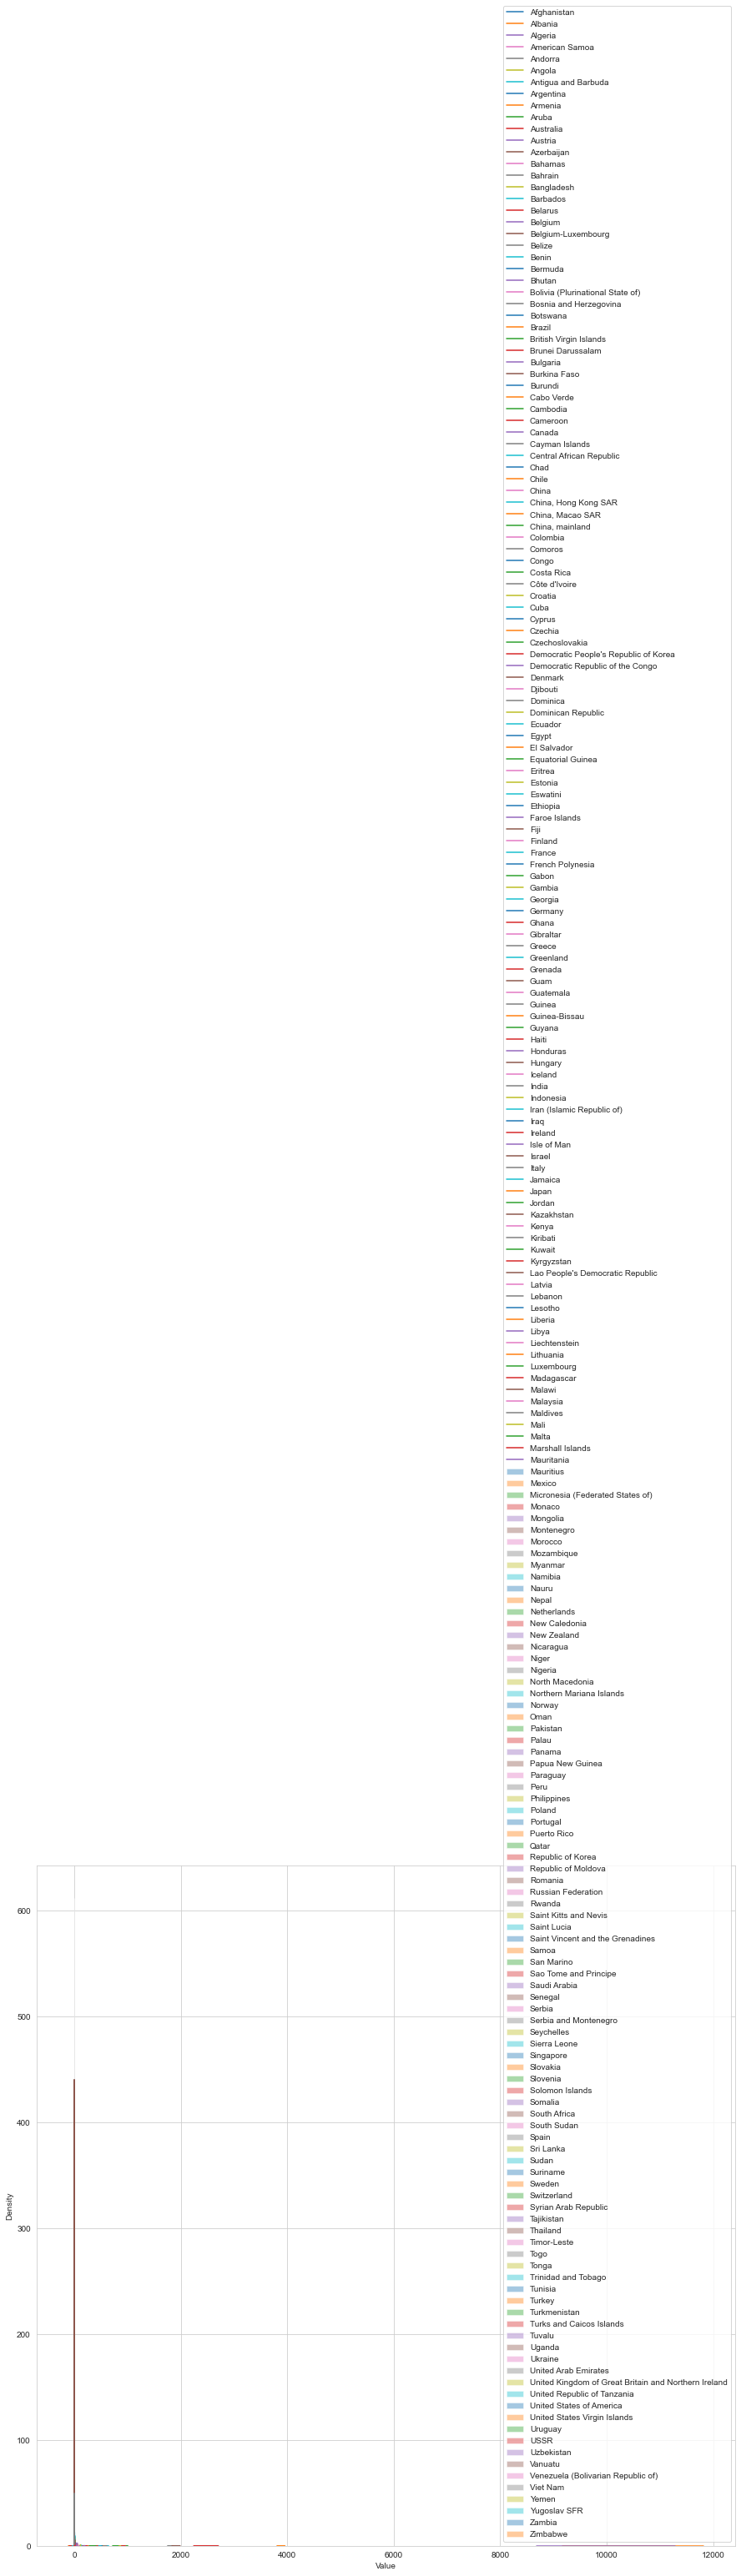

In [20]:
countries=df['Area'].unique()
for country in countries:
    sns.distplot(df[df["Area"] == country]["Value"])
sns.set_style("whitegrid")
plt.figure(figsize=(15, 15))

for country in countries:
    sns.distplot(df[df["Area"] == country]["Value"])

plt.legend(countries)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'China, mainland'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'France'),
  Text(7, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(8, 0, 'Republic of Korea'),
  Text(9, 0, 'India'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'China, Hong Kong SAR'),
  Text(13, 0, 'Dominican Republic'),
  Text(14, 0, 'Malaysia'),
  Text(15, 0, 'Haiti'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'Philippines'),
  Text(18, 0, 'Viet Nam'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Jamaica'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Australia'),
  Text(26, 0, 'Mongolia'),
  Text(27, 0, 'Portugal'),
  Text(28, 0, 'Sweden'),
  Text(29, 0,

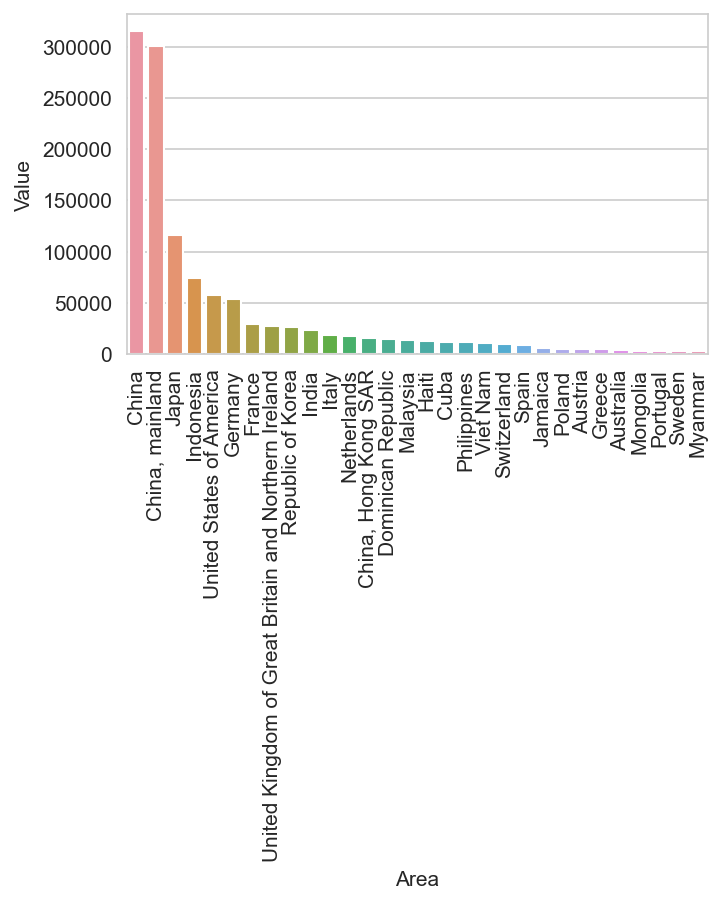

In [21]:
a = df.groupby(["Area"]).sum().sort_values(
    by=["Value"], ascending=False).head(30)
a

plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.barplot(x=a.index, y='Value', data=a)
plt.xticks(rotation=90)


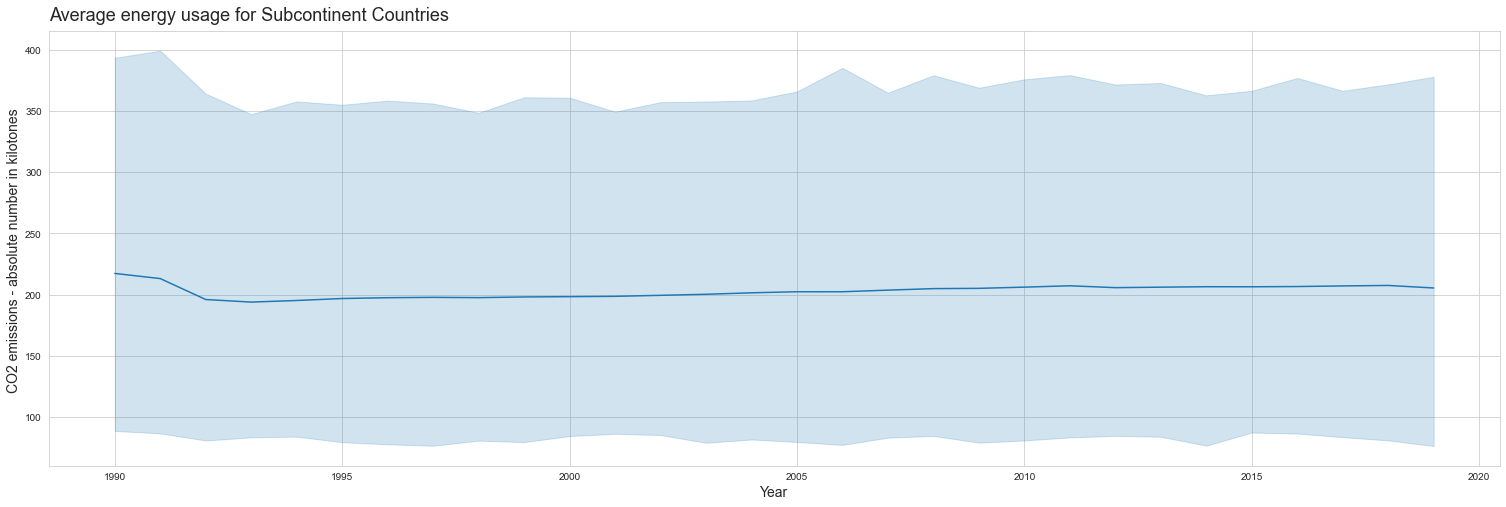

In [49]:
plt.figure(figsize=(26, 8))
sns.lineplot(x="Year", y="Value", data=df)

#customisation
#plt.ylim(10,)
#sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Average CO2 emission for different Countries",
          fontsize=18, loc='left', y=1.01)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()


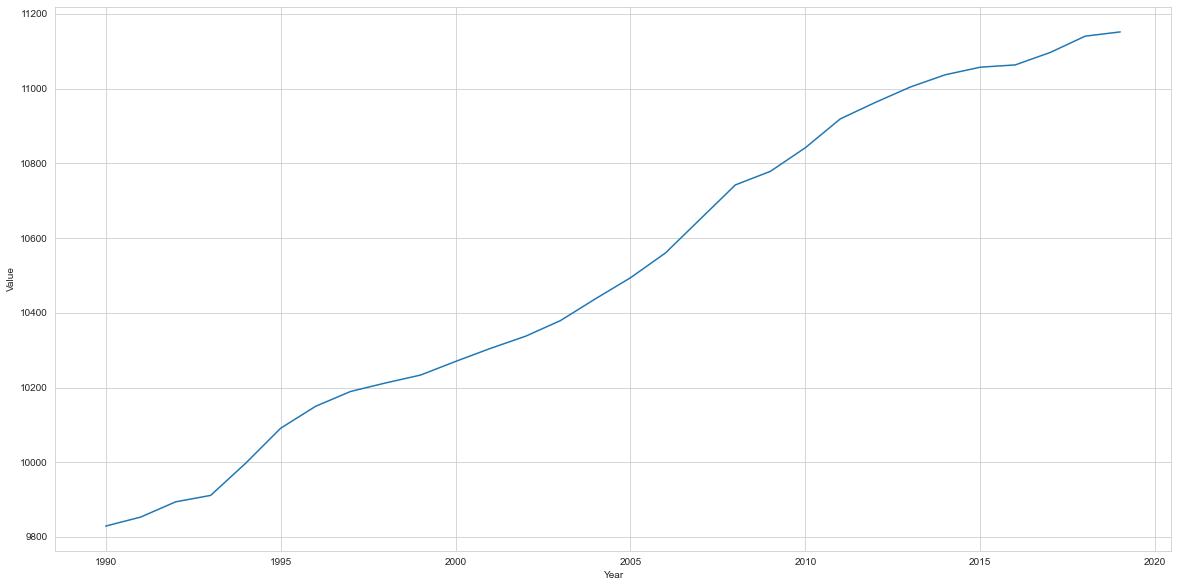

In [50]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df[df["Area"]=="China"])
plt.show()

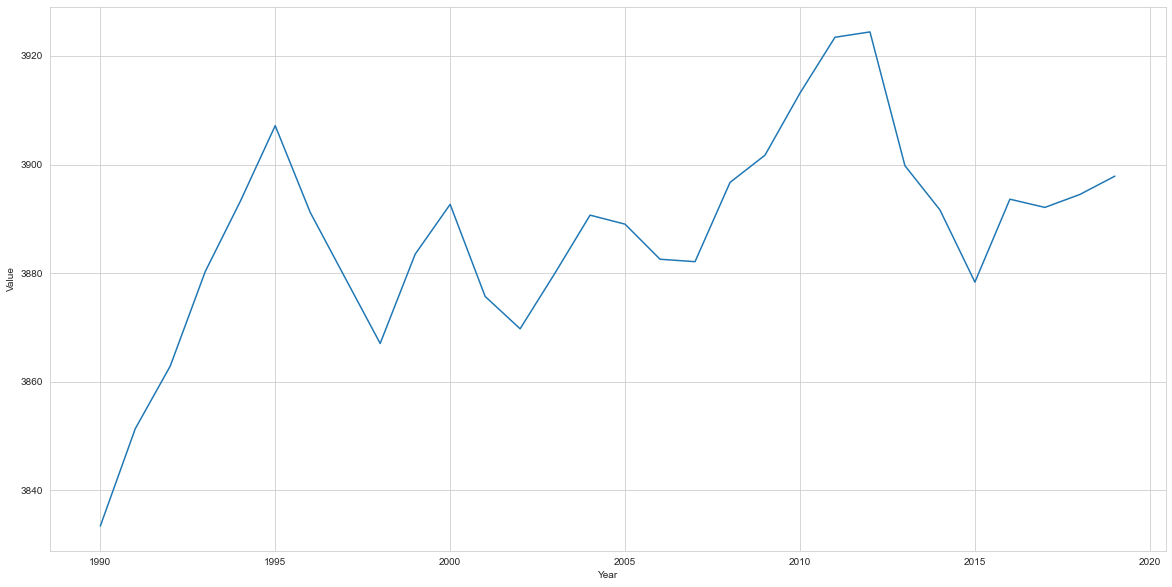

In [52]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df[df["Area"] == "Japan"])
plt.show()


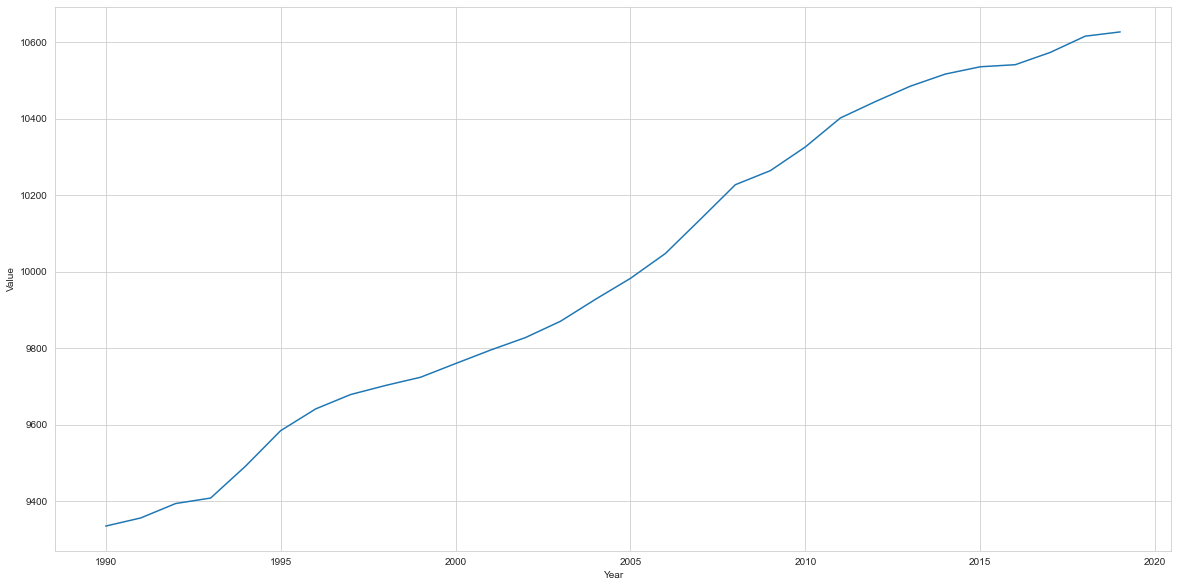

In [54]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df[df["Area"] == "China, mainland"])
plt.show()


#### Label Encdoing

In [122]:
# there are some columns which are not in use but to get a really clear picture lets use those as well
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Domain'] = label.fit_transform(df['Domain'])
df['Domain Code'] = label.fit_transform(df['Domain Code'])
df['Area Code (ISO3)'] = label.fit_transform(df['Area Code (ISO3)'])
df['Area'] = label.fit_transform(df['Area'])
df['Element'] = label.fit_transform(df['Element'])
df['Item'] = label.fit_transform(df['Item'])
df['Unit'] = label.fit_transform(df['Unit'])
df['Flag'] = label.fit_transform(df['Flag'])
df['Flag Description'] = label.fit_transform(df['Flag Description'])


c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percentage of nans per feature column')

<Figure size 720x360 with 0 Axes>

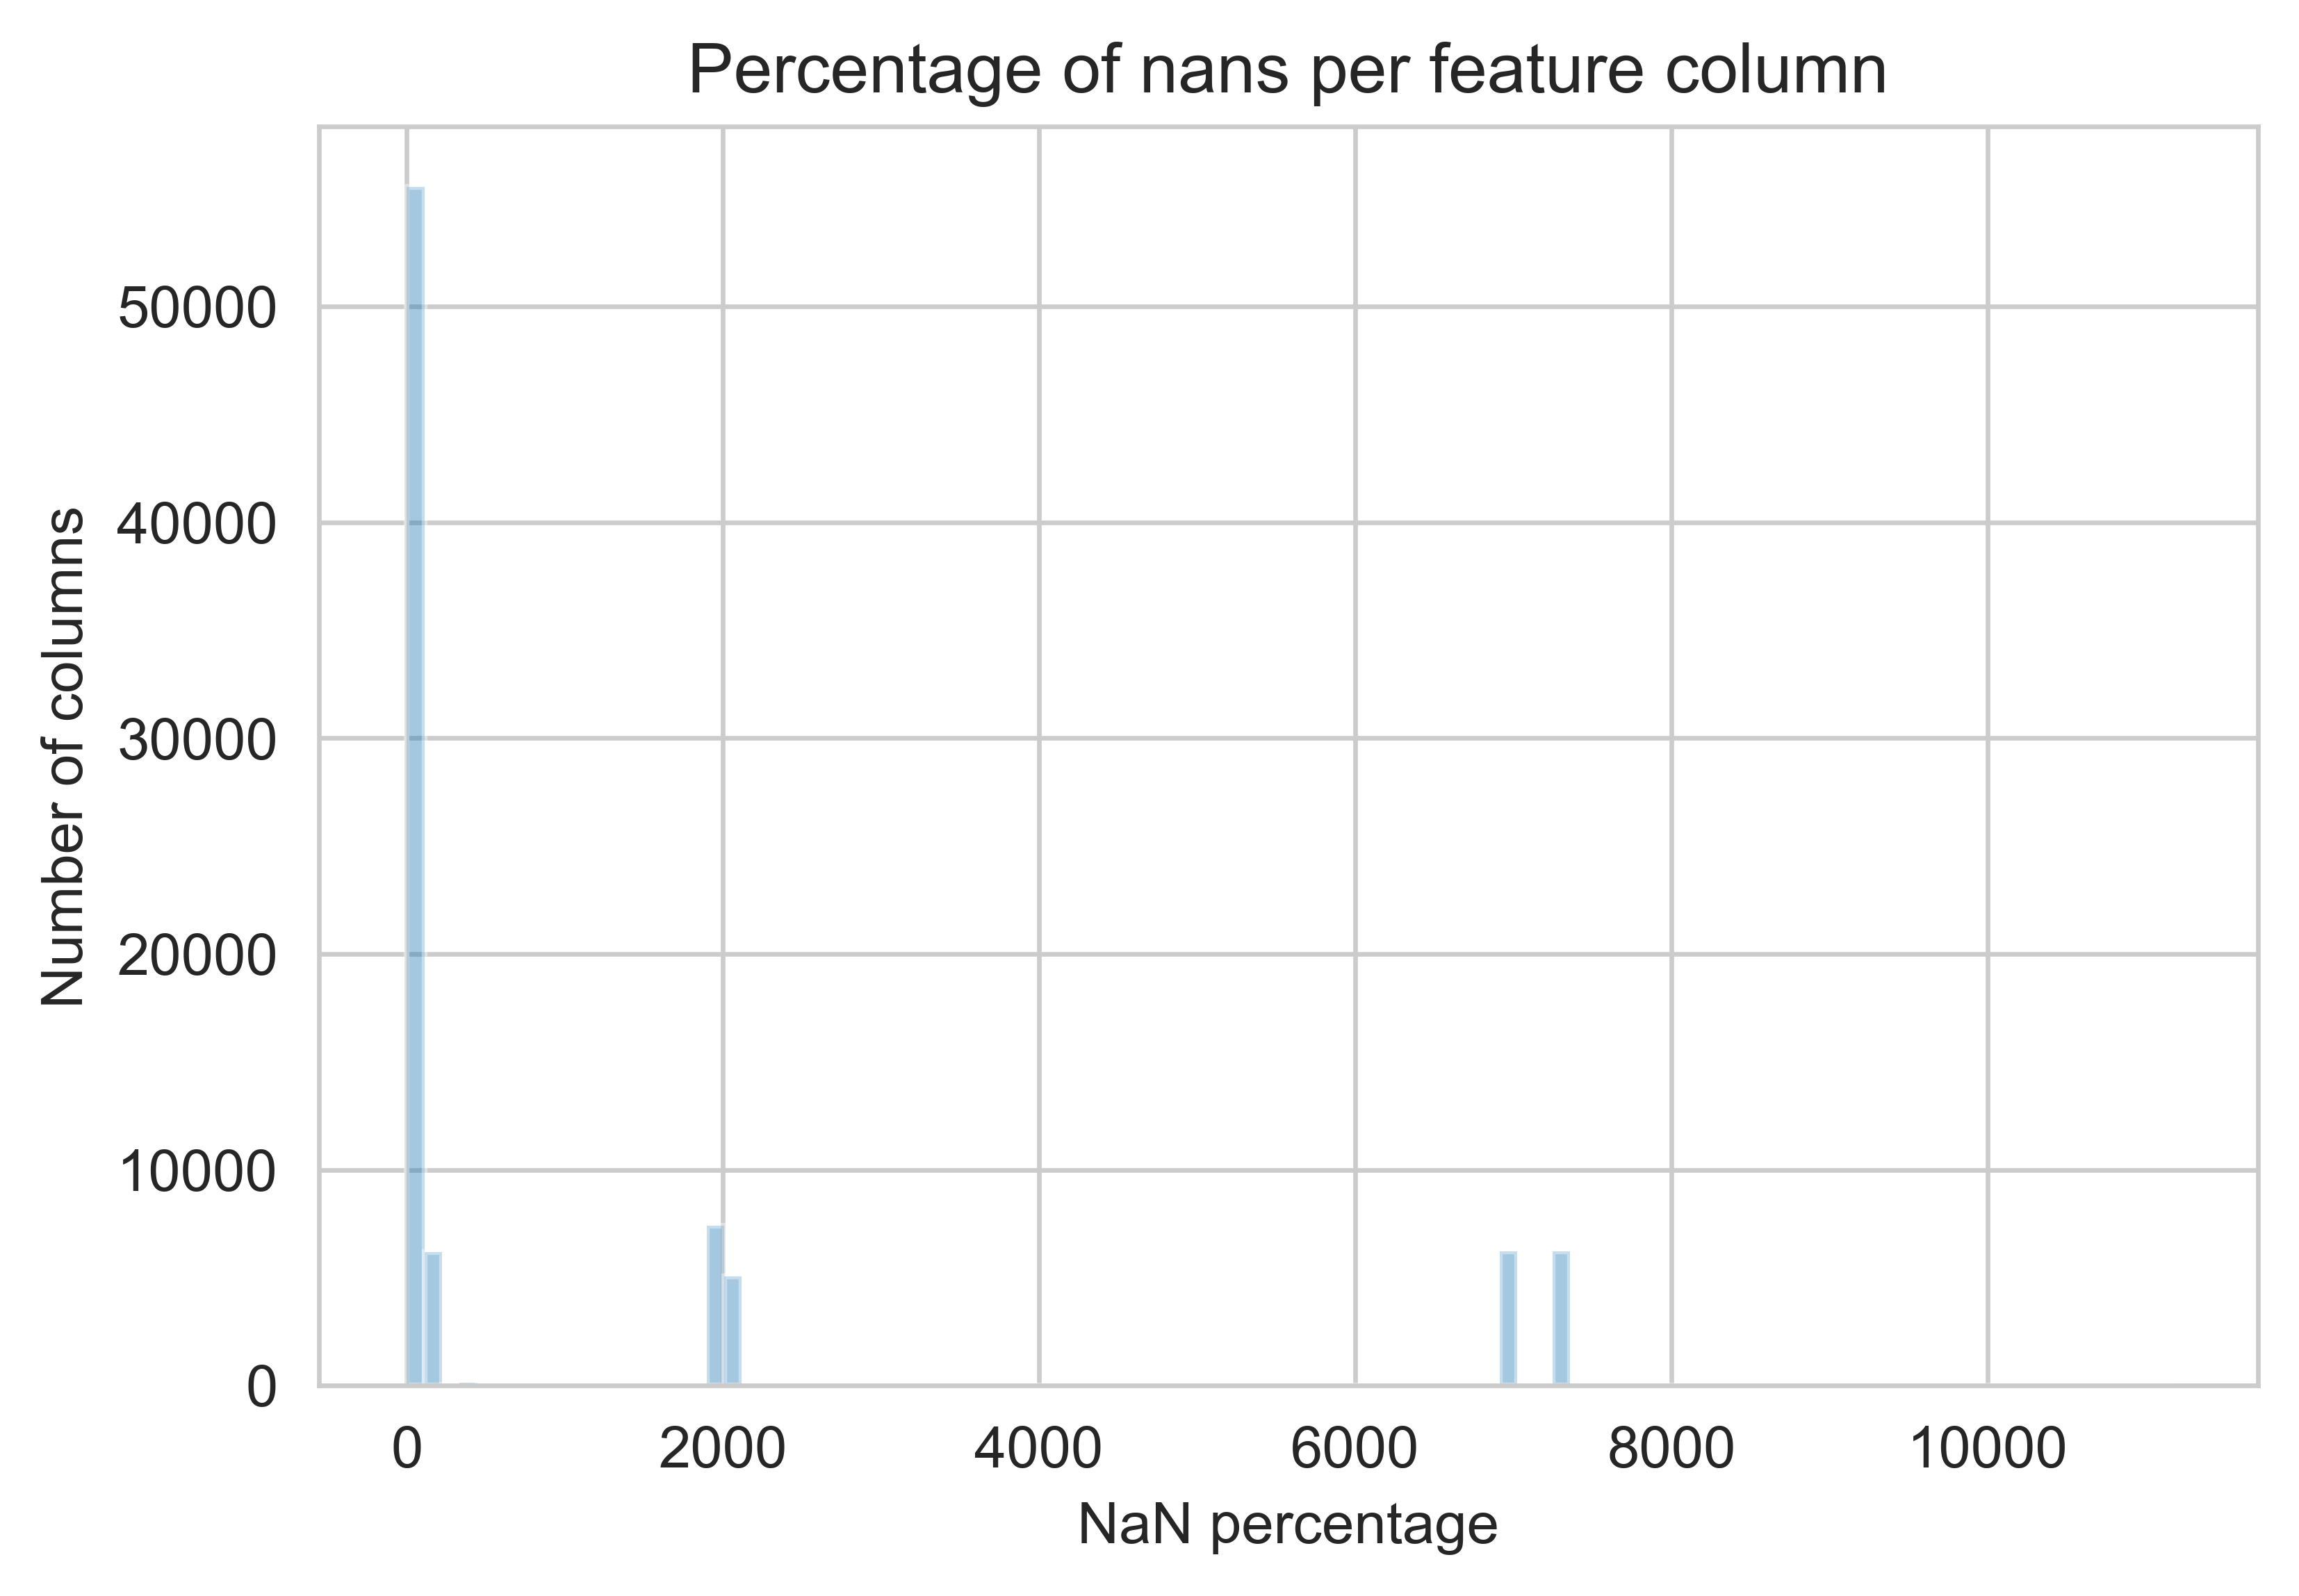

In [22]:
plt.figure(figsize=(10, 5))
plt.figure(dpi=600)
sns.distplot(df, bins=100, kde=False)
plt.xlabel("NaN percentage")
plt.ylabel("Number of columns")
plt.title("Percentage of nans per feature column")

In [23]:
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0,0,6,0,7273,0,6990,0,1990,1990,0,0.0,1,1
1,0,0,6,0,7273,0,6990,0,1991,1991,0,0.0,1,1
2,0,0,6,0,7273,0,6990,0,1992,1992,0,0.0,1,1
3,0,0,6,0,7273,0,6990,0,1993,1993,0,0.0,1,1
4,0,0,6,0,7273,0,6990,0,1994,1994,0,0.0,1,1


In [24]:
df.describe()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,6238.0,6238.0,6238.000000,6238.000000,6238.0,6238.0,6238.0,6238.0,6238.000000,6238.000000,6238.0,6238.000000,6238.000000,6238.000000
mean,0.0,0.0,108.976274,106.821097,7273.0,0.0,6990.0,0.0,2004.677300,2004.677300,0.0,202.675467,0.995191,0.995191
std,0.0,0.0,61.703783,62.111647,0.0,0.0,0.0,0.0,8.603289,8.603289,0.0,1066.676986,0.069187,0.069187
min,0.0,0.0,0.000000,0.000000,7273.0,0.0,6990.0,0.0,1990.000000,1990.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,0.0,56.000000,54.000000,7273.0,0.0,6990.0,0.0,1997.000000,1997.000000,0.0,0.000000,1.000000,1.000000
50%,0.0,0.0,108.000000,106.000000,7273.0,0.0,6990.0,0.0,2005.000000,2005.000000,0.0,0.652579,1.000000,1.000000
75%,0.0,0.0,161.000000,159.750000,7273.0,0.0,6990.0,0.0,2012.000000,2012.000000,0.0,30.517272,1.000000,1.000000
max,0.0,0.0,216.000000,216.000000,7273.0,0.0,6990.0,0.0,2019.000000,2019.000000,0.0,11151.696408,1.000000,1.000000


In [25]:
corr = df.corr(method="pearson")
corr


,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Domain Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Code (ISO3),NaN,NaN,1.000000,0.845569,NaN,NaN,NaN,NaN,0.009603,0.009603,NaN,-0.139736,0.077715,0.077715
Area,NaN,NaN,0.845569,1.000000,NaN,NaN,NaN,NaN,0.005667,0.005667,NaN,-0.080933,0.073674,0.073674
Element Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Element,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Code,NaN,NaN,0.009603,0.005667,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.002170,0.001433,0.001433
Year,NaN,NaN,0.009603,0.005667,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.002170,0.001433,0.001433


<AxesSubplot:>

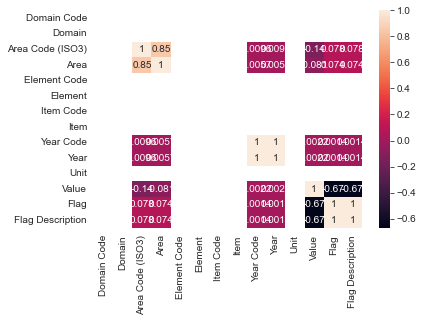

In [26]:
sns.heatmap(corr, annot=True)


#### Useless feature Columns

#### Dropping Useless columns

In [111]:
# As per my assumption we really don't need Domain Code, Domain, Element Code, Element, Item Code, Item
df.drop(['Domain Code', 'Domain', 'Element Code', 'Element', 'Item Code', 'Item', 'Unit','Flag','Flag Description'], axis=1, inplace=True)

In [112]:
df.head()

,Area Code (ISO3),Area,Year Code,Year,Value
0,AFG,Afghanistan,1990,1990,0.0
1,AFG,Afghanistan,1991,1991,0.0
2,AFG,Afghanistan,1992,1992,0.0
3,AFG,Afghanistan,1993,1993,0.0
4,AFG,Afghanistan,1994,1994,0.0


In [113]:
corr = df.corr(method="pearson")
corr


,Year Code,Year,Value
Year Code,1.00000,1.00000,0.00217
Year,1.00000,1.00000,0.00217
Value,0.00217,0.00217,1.00000


<AxesSubplot:>

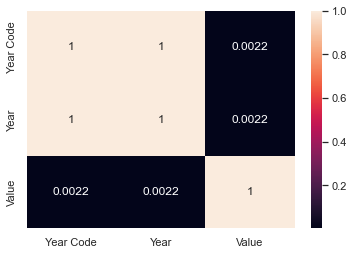

In [114]:
sns.heatmap(corr, annot=True)


#### Checking the Normality of Data

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distribution

ValueError: could not convert string to float: 'Afghanistan'

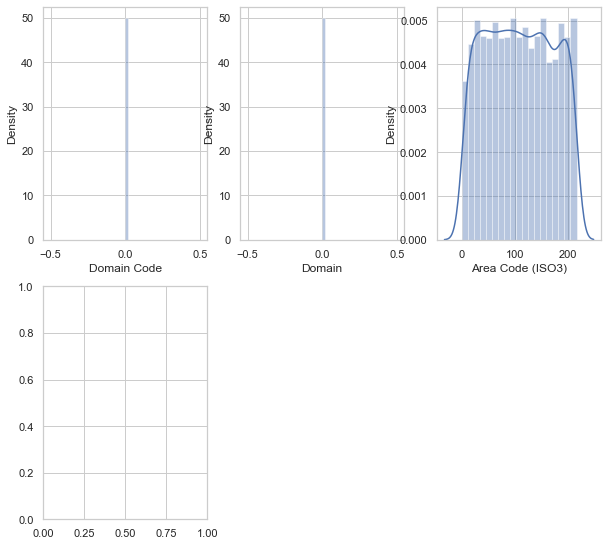

In [123]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.distplot(df[i])
    c = c+1
plt.show()


c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

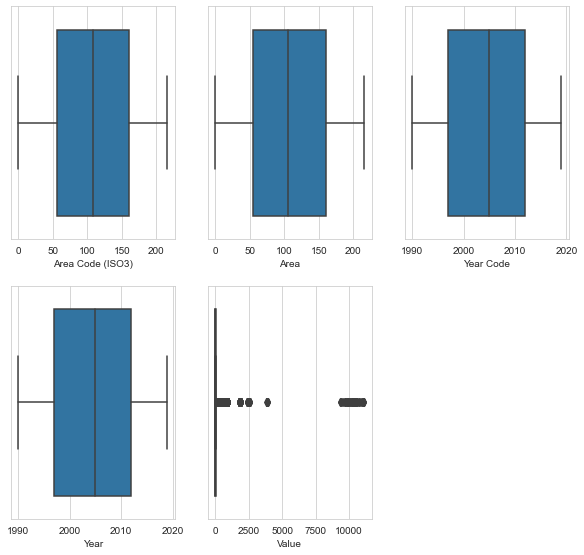

In [32]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.boxplot(df[i])
    c = c+1
plt.show()


#### To remove outliers

In [124]:
# there are some outliers so we are going to taking those off from data set
def mod_outlier(df):
    col_vals = df.columns
    df1 = df.copy()
    df = df._get_numeric_data()

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for col in col_vals:
        for i in range(0, len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]

            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]

    for col in col_vals:
        df1[col] = df[col]

        return(df1)


In [125]:
mod_outlier(df)


KeyError: 'Area'

#### Checking if outliers are gone or not

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

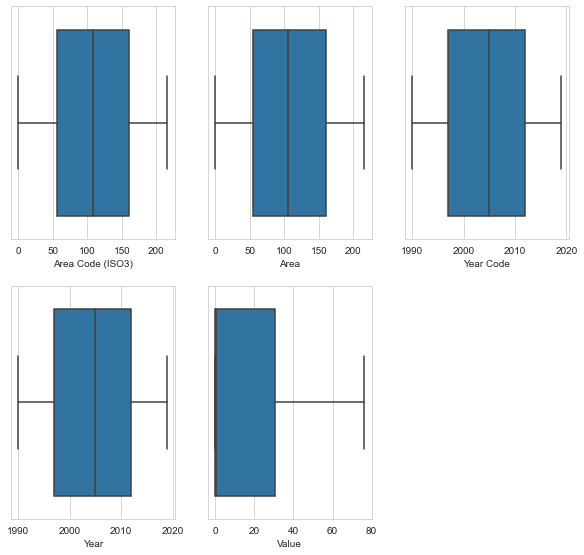

In [35]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.boxplot(df[i])
    c = c+1
plt.show()


In [36]:
df.head()

,Area Code (ISO3),Area,Year Code,Year,Value
0,6,0,1990,1990,0.0
1,6,0,1991,1991,0.0
2,6,0,1992,1992,0.0
3,6,0,1993,1993,0.0
4,6,0,1994,1994,0.0


In [37]:
df.nunique()

Area Code (ISO3)     217
Area                 217
Year Code             30
Year                  30
Value               2376
dtype: int64

####  DATA VISUALIZATION

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

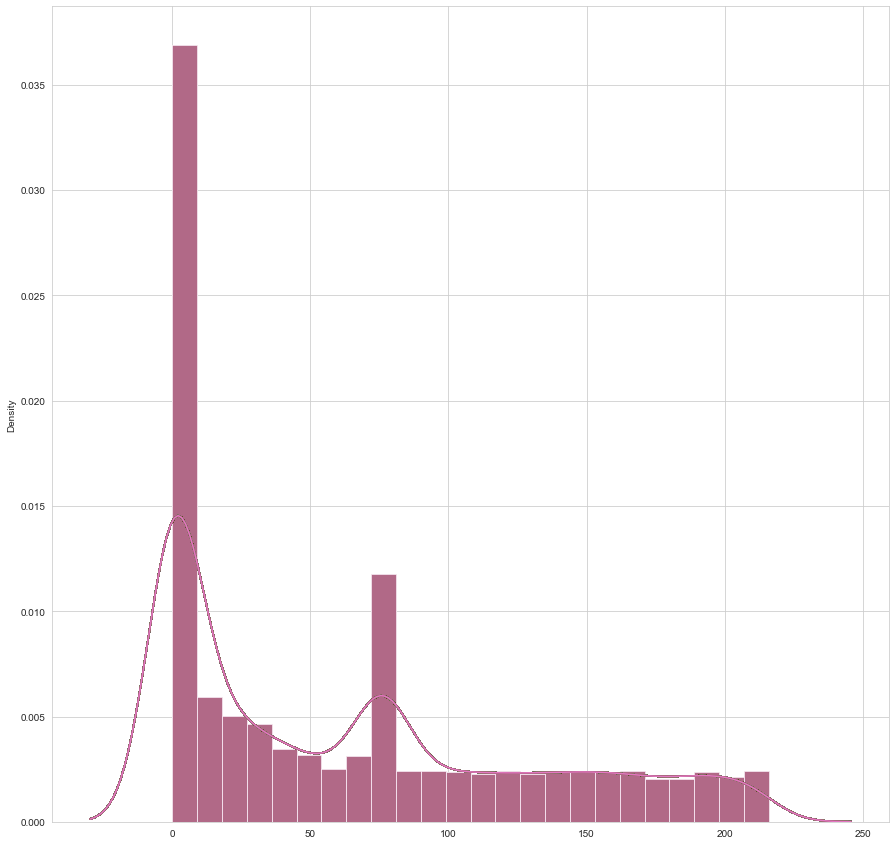

In [38]:
countries = df['Area'].unique()
sns.set_style("whitegrid")
plt.figure(figsize=(15, 15))

for country in countries:
    sns.distplot(df[["Area","Value"]])


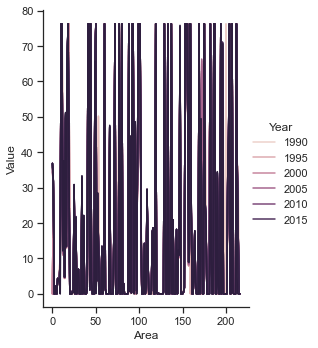

In [39]:
sns.set_theme(style="ticks")

palette = sns.color_palette("rocket_r")

sns.relplot(
    data=df,
    x="Area", y="Value",
    hue="Year",
    kind="line", size_order=["T1", "T2"],
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


<AxesSubplot:xlabel='Value', ylabel='Area'>

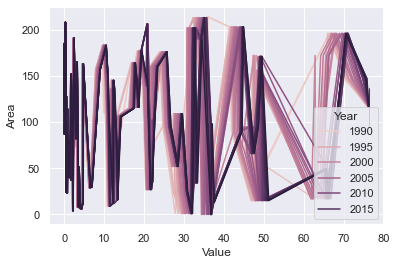

In [40]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="Value", y="Area",
             hue="Year",
             data=df)


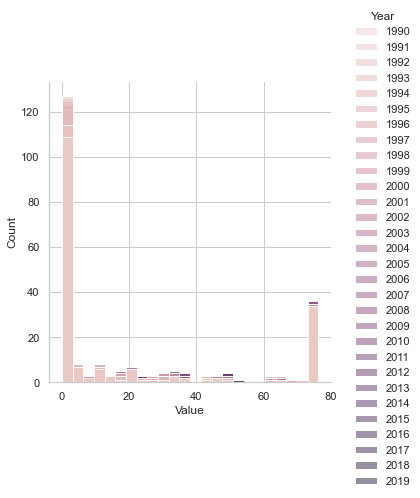

In [41]:
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="Value", hue="Year"    
)



<AxesSubplot:>

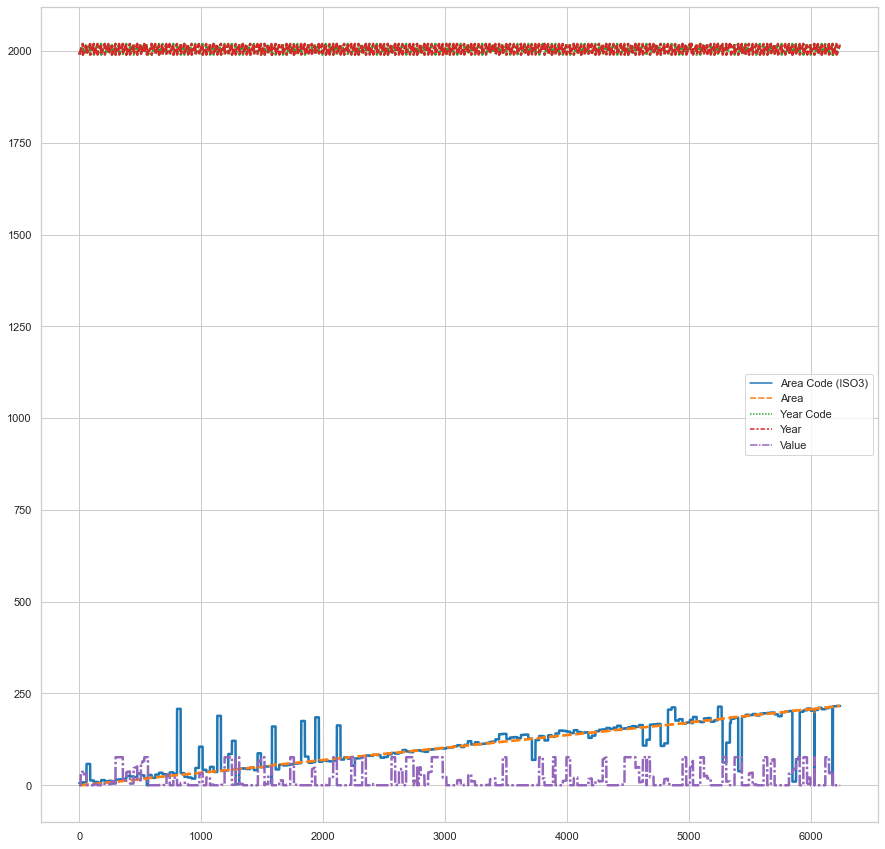

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.lineplot(data=df, palette="tab10", linewidth=2.5)


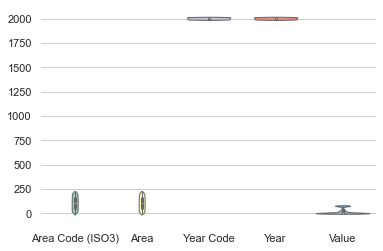

In [43]:
sns.set_theme(style="whitegrid")


sns.violinplot(data=df, palette="Set3", bw=.2, cut=1, linewidth=1)
sns.despine(left=True, bottom=True)


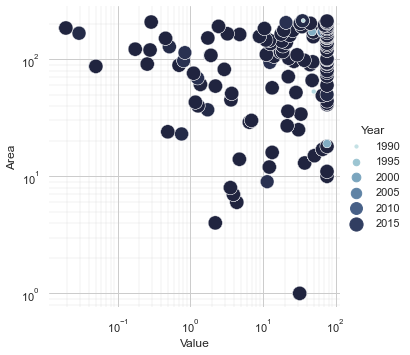

In [44]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="Value", y="Area",
    hue="Year", size="Year",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


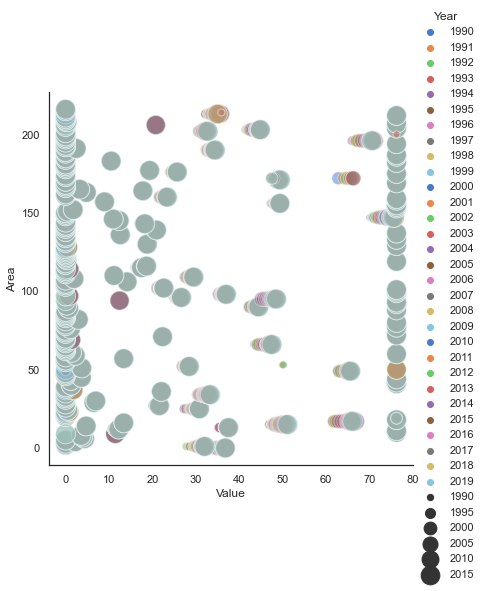

In [45]:
sns.set_theme(style="white")

sns.relplot(x="Value", y="Area", hue="Year", size="Year",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)


<AxesSubplot:xlabel='Value', ylabel='Area'>

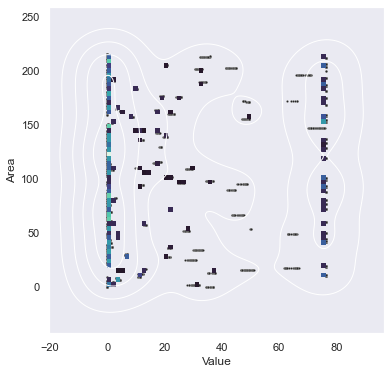

In [46]:
sns.set_theme(style="dark")


f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='Value', y='Area', s=5, color=".15",data=df)
sns.histplot(x='Value', y='Area', bins=50, pthresh=.1, cmap="mako",data=df)
sns.kdeplot(x='Value', y='Area', levels=5, color="w", linewidths=1, data=df)


In [54]:
s=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
s

,Area Code (ISO3),Area,Year Code,Value
Year,,,,
2014,23260,22778,426968,4181.583750
2017,23260,22778,427604,4180.774814
2013,23260,22778,426756,4180.382573
2012,23260,22778,426544,4176.987560
2011,22911,22413,422310,4176.498807
2016,23260,22778,427392,4176.341295
2015,23260,22778,427180,4175.784367
2008,22911,22413,421680,4171.175828
2010,22911,22413,422100,4169.679111


In [61]:
a = df.groupby(["Year", "Value"]).sum().sort_values(
    by="Area").head(30)
a


,,Area Code (ISO3),Area,Year Code
Year,Value,,,
2013,36.904663,6,0,2013
2018,36.821074,6,0,2018
2007,35.744762,6,0,2007
2011,36.680935,6,0,2011
2008,35.801329,6,0,2008
2014,36.898894,6,0,2014
2002,34.381732,6,0,2002
2006,35.223750,6,0,2006
2019,36.790219,6,0,2019


In [65]:
c = df.groupby(["Year", "Area"]).sum().sort_values(
    by="Value", ascending=False).head(30).nlargest(30,'Value')
c


Area Code (ISO3)  Year Code      Value
Year Area                                        
2010 158                108       2010  76.293181
2013 207                204       2013  76.293181
2003 11                  16       2003  76.293181
     10                  15       2003  76.293181
2017 60                  57       2017  76.293181
2014 10                  15       2014  76.293181
1995 194                196       1995  76.293181
     158                108       1995  76.293181
     155                161       1995  76.293181
     154                158       1995  76.293181
     153                155       1995  76.293181
2003 77                  53       2003  76.293181
     72                  67       2003  76.293181
1995 119                140       1995  76.293181
2017 93                  90       2017  76.293181
     92                  92       2017  76.293181
     88                  88       2017  76.293181
2013 204                 71       2013  76.293181
1995 129                134       1995  76.293181
2013 194                196       2013  76.293181
2003 60                  57       2003  76.293181
1995 137                146       1995  76.293181
2003 50                  49       2003  76.293181
2017 80                  79       2017  76.293181
2013 212                210       2013  76.293181
2003 44                   3       2003  76.293181
     42                  85       2003  76.293181
     41                  40       2003  76.293181
2017 77                  53       2017  76.293181
1995 187                 38       1995  76.293181

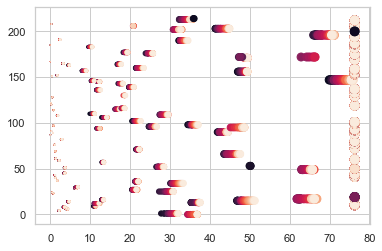

In [72]:
plt.scatter('Value', 'Area', c='Year',s='Value', data=df)
plt.show()


In [77]:
s = df.groupby(["Year"]).sum().sort_values(
    by="Value", ascending=False).head(30)
s


,Area Code (ISO3),Area,Year Code,Value
Year,,,,
2014,23260,22778,426968,4181.583750
2017,23260,22778,427604,4180.774814
2013,23260,22778,426756,4180.382573
2012,23260,22778,426544,4176.987560
2011,22911,22413,422310,4176.498807
2016,23260,22778,427392,4176.341295
2015,23260,22778,427180,4175.784367
2008,22911,22413,421680,4171.175828
2010,22911,22413,422100,4169.679111


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019')])

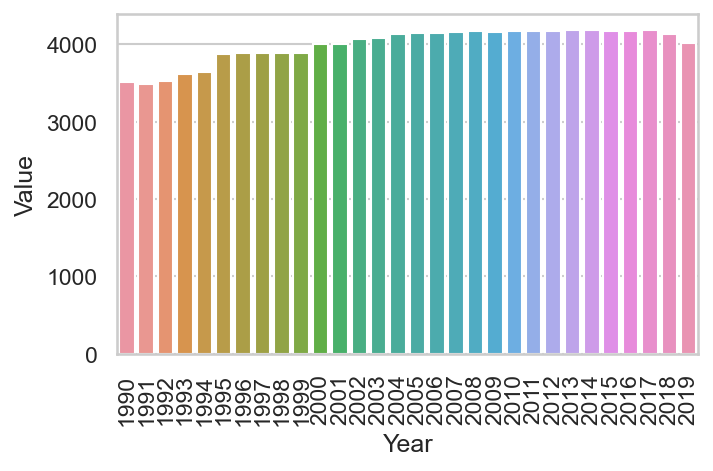

In [78]:
plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.barplot(x=s.index, y='Value', data=s)
plt.xticks(rotation=90)


In [79]:
a = df.groupby(["Area"]).sum().sort_values(
    by="Value", ascending=False).head(30)
a


,Area Code (ISO3),Year Code,Year,Value
Area,,,,
101,3030,60135,60135,2288.795419
204,2130,60135,60135,2288.795419
119,4200,60135,60135,2288.795419
129,4020,60135,60135,2288.795419
80,2370,60135,60135,2288.795419
158,3240,60135,60135,2288.795419
187,1140,60135,60135,2288.795419
186,5520,60135,60135,2288.795419
182,1860,60135,60135,2288.795419


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '11'),
  Text(1, 0, '41'),
  Text(2, 0, '42'),
  Text(3, 0, '44'),
  Text(4, 0, '60'),
  Text(5, 0, '72'),
  Text(6, 0, '77'),
  Text(7, 0, '80'),
  Text(8, 0, '88'),
  Text(9, 0, '92'),
  Text(10, 0, '93'),
  Text(11, 0, '99'),
  Text(12, 0, '100'),
  Text(13, 0, '101'),
  Text(14, 0, '119'),
  Text(15, 0, '129'),
  Text(16, 0, '137'),
  Text(17, 0, '153'),
  Text(18, 0, '154'),
  Text(19, 0, '155'),
  Text(20, 0, '158'),
  Text(21, 0, '169'),
  Text(22, 0, '175'),
  Text(23, 0, '182'),
  Text(24, 0, '186'),
  Text(25, 0, '187'),
  Text(26, 0, '194'),
  Text(27, 0, '204'),
  Text(28, 0, '207'),
  Text(29, 0, '212')])

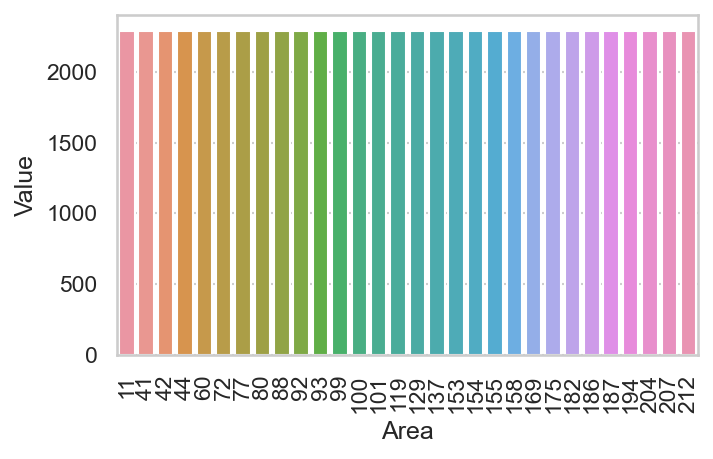

In [80]:
a = df.groupby(["Area"]).sum().sort_values(
    by="Value", ascending=False).head(30)
a

plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.Barlow(x=a.index, y='Value', data=a)
plt.xticks(rotation=90)


#### For subcontinent

In [55]:
df_sub = df[df["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()


,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
446,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,46.863842,Fc,Calculated data
447,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,46.824124,Fc,Calculated data
448,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,46.870611,Fc,Calculated data
449,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,46.957732,Fc,Calculated data
450,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,46.992608,Fc,Calculated data


<AxesSubplot:xlabel='Year'>

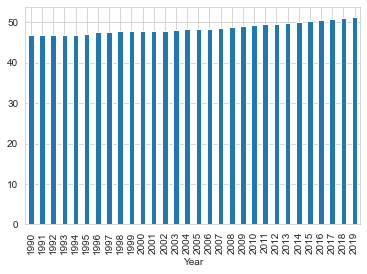

In [57]:
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Year'>

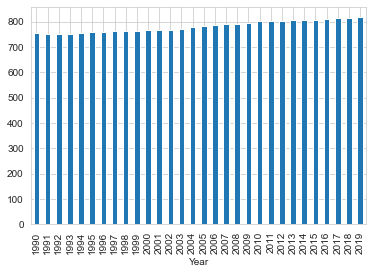

In [58]:
df_sub[df_sub["Area"]=="India"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Year'>

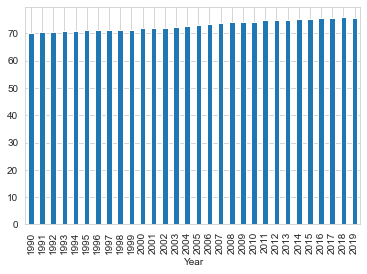

In [59]:
df_sub[df_sub["Area"]=="Pakistan"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:ylabel='Area'>

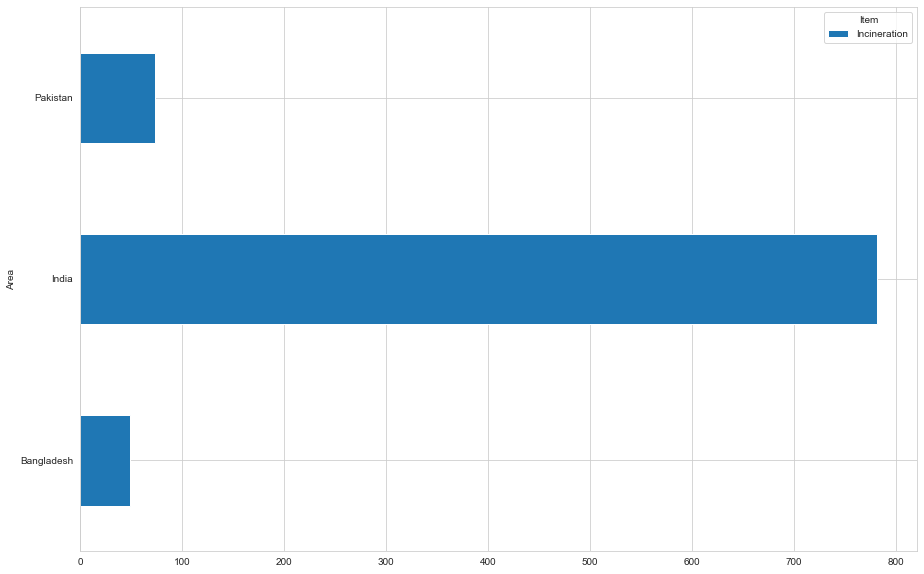

In [62]:
df_sub.groupby(['Area', 'Item'])['Value'].mean(
).unstack().plot(kind='barh', figsize=(15, 10))


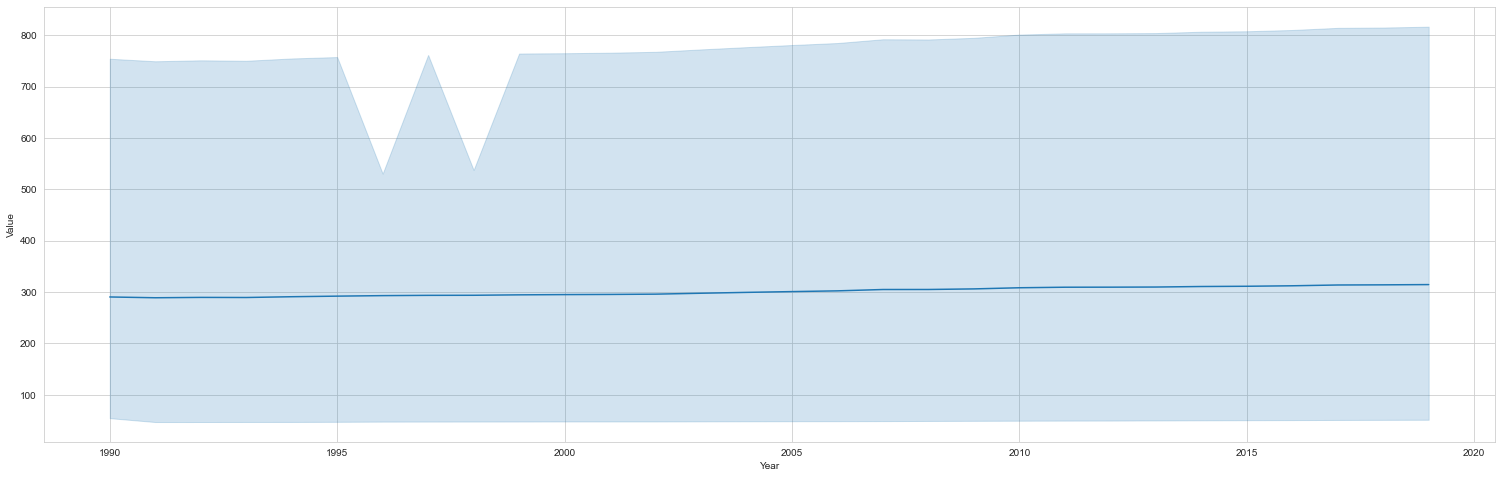

In [63]:
plt.figure(figsize=(26, 8))
sns.lineplot(x="Year", y="Value", data=df_sub)

#customisation
#plt.ylim(10,)
#sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()


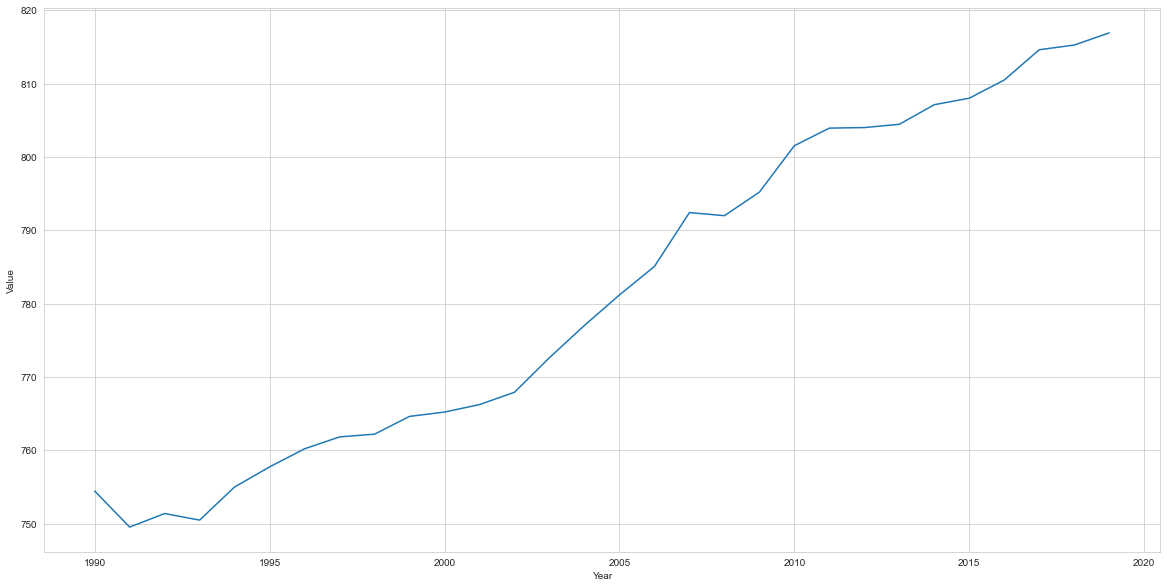

In [64]:
# Contruct visualisation for india's energy usage increase over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df_sub[df_sub["Area"] == "India"])
plt.show()
